In [1]:
from utils import *

import pandas as pd
import numpy as np
from pycaret.classification import *
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

In [2]:
# Voy a intentar obtener los datos faltantes de las coordenadas (long y lat) en base a datos geograficos:

# wpt_name basin  subvillage   region  region_code  district_code lga ward

df5 = pd.read_pickle("./pickles_temp/V4_1.pkl")

In [3]:
df5_geo = df5.copy()
df5_geo = df5.loc[:, ['id', 'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward']]
df5_geo.head(50)

,id,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward
0,69572,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi
1,8776,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta
2,34310,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika
3,67743,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu
4,19728,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi
5,9944,39.172796,-4.765587,Tajiri,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa
6,19816,33.362410,-3.766365,Kwa Ngomho,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye
7,54551,32.620617,-4.226198,Tushirikiane,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo
8,53934,32.711100,-5.146712,Kwa Ramadhan Musa,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia
9,46144,30.626991,-1.257051,Kwapeto,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho


In [4]:
from sklearn.impute import KNNImputer

# Crear el imputador KNN con 3 vecinos
imputer_knn = KNNImputer(n_neighbors=3)

# Seleccionar solo las columnas que deseas imputar
columns_to_impute = ['longitude', 'latitude']
df5_geo_subset = df5_geo[columns_to_impute]

# Ajustar el imputador KNN a los datos
imputer_knn.fit(df5_geo_subset)

# Imputar los valores faltantes en df5_geo_subset
df5_geo_subset_imputed = pd.DataFrame(imputer_knn.transform(df5_geo_subset), columns=columns_to_impute)

# Reemplazar las columnas imputadas en el DataFrame original
df5_geo_imputed = df5_geo.copy()
df5_geo_imputed[columns_to_impute] = df5_geo_subset_imputed

# Mostrar el DataFrame resultante con valores imputados
df5_geo_imputed

,id,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward
0,69572,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi
1,8776,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta
2,34310,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika
3,67743,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu
4,19728,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi
...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,37.169807,-3.253847,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi
59396,27263,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo
59397,37057,34.017087,-8.750434,Mashine,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala
59398,31282,35.861315,-6.378573,Mshoro,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu


In [5]:
missing_values_summary(df5_geo_imputed)

,Valores Nulos,% de Valores Nulos
id,0,0.0
longitude,0,0.0
latitude,0,0.0
wpt_name,2,0.0
basin,0,0.0
subvillage,371,0.6
region,0,0.0
region_code,0,0.0
district_code,0,0.0
lga,0,0.0


In [6]:
""" 
# Tengo curiosidad por saber si se han imputado con sentido o sin él. Voy a usar un Random Forest Classifier 
# y voy a comparar a mano 3 valores al azar


df5_geo_imputed_labeled = df5.copy()
df5_geo_imputed_labeled = df5_geo_imputed_labeled.loc[:, ['id', 'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward']]
# Elimino los registros con missings en longitud
df5_geo_imputed_labeled.dropna(subset=['longitude'], inplace=True)
# Aplico labelencoder a todo lo demás 
variables_object = df5_geo_imputed_labeled.select_dtypes(include=['object'])

label_encoder = LabelEncoder()

for x in variables_object:
    df5_geo_imputed_labeled[x] = label_encoder.fit_transform(df5_geo_imputed_labeled[x])
missing_values_summary(df5_geo_imputed_labeled) """

" \n# Tengo curiosidad por saber si se han imputado con sentido o sin él. Voy a usar un Random Forest Classifier \n# y voy a comparar a mano 3 valores al azar\n\n\ndf5_geo_imputed_labeled = df5.copy()\ndf5_geo_imputed_labeled = df5_geo_imputed_labeled.loc[:, ['id', 'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward']]\n# Elimino los registros con missings en longitud\ndf5_geo_imputed_labeled.dropna(subset=['longitude'], inplace=True)\n# Aplico labelencoder a todo lo demás \nvariables_object = df5_geo_imputed_labeled.select_dtypes(include=['object'])\n\nlabel_encoder = LabelEncoder()\n\nfor x in variables_object:\n    df5_geo_imputed_labeled[x] = label_encoder.fit_transform(df5_geo_imputed_labeled[x])\nmissing_values_summary(df5_geo_imputed_labeled) "

In [7]:
""" model_setup = setup(data=df5_geo_imputed_labeled, 
                    target = 'longitude', 
                    session_id=1, 
                    ) """
# Esto falla porque setup trata a la variable objetivo como categórica, y no puede tener ningún registro con solo una frecuencia
""" print(df5_geo_imputed_labeled['longitude'].value_counts())"""
# Y como vemos tiene varias

" print(df5_geo_imputed_labeled['longitude'].value_counts())"

In [8]:
# No merece la pena compplicarse. Esto solo safecta a 1.300 registros de 59.000. Doy por bueno el KNN
# Voy a predecir al altura por la localización mediante KNN otra vez

df5_altura = df5_geo_imputed.loc[:, ['id', 'longitude', 'latitude']].copy()


In [9]:
df5_altura = pd.merge(df5_altura, df5[['id', 'gps_height']], on='id', how='inner')


In [10]:
df5_altura

,id,longitude,latitude,gps_height
0,69572,34.938093,-9.856322,1390.0
1,8776,34.698766,-2.147466,1399.0
2,34310,37.460664,-3.821329,686.0
3,67743,38.486161,-11.155298,263.0
4,19728,31.130847,-1.825359,NaN
...,...,...,...,...
59395,60739,37.169807,-3.253847,1210.0
59396,27263,35.249991,-9.070629,1212.0
59397,37057,34.017087,-8.750434,NaN
59398,31282,35.861315,-6.378573,NaN


In [11]:
# 70'
# Imputo por KNN para hallar la altura
imputer_knn = KNNImputer(n_neighbors=2)  # deben ser dos porque no quiero que considere id

# Ajustar el imputador KNN a los datos
imputer_knn.fit(df5_altura)

# Imputar los valores faltantes
df5_altura_imputed = pd.DataFrame(imputer_knn.transform(df5_altura), columns=df5_altura.columns)
df5_altura_imputed

,id,longitude,latitude,gps_height
0,69572.0,34.938093,-9.856322,1390.0
1,8776.0,34.698766,-2.147466,1399.0
2,34310.0,37.460664,-3.821329,686.0
3,67743.0,38.486161,-11.155298,263.0
4,19728.0,31.130847,-1.825359,1527.0
...,...,...,...,...
59395,60739.0,37.169807,-3.253847,1210.0
59396,27263.0,35.249991,-9.070629,1212.0
59397,37057.0,34.017087,-8.750434,1532.5
59398,31282.0,35.861315,-6.378573,820.5


In [12]:
print(df5_altura_imputed.shape)
df5_altura_imputed.head(50)

(59400, 4)


,id,longitude,latitude,gps_height
0,69572.0,34.938093,-9.856322,1390.0
1,8776.0,34.698766,-2.147466,1399.0
2,34310.0,37.460664,-3.821329,686.0
3,67743.0,38.486161,-11.155298,263.0
4,19728.0,31.130847,-1.825359,1527.0
5,9944.0,39.172796,-4.765587,1411.5
6,19816.0,33.362410,-3.766365,1943.5
7,54551.0,32.620617,-4.226198,1142.5
8,53934.0,32.711100,-5.146712,1722.5
9,46144.0,30.626991,-1.257051,1473.5


df5: 
-------------- GPS_HEIGHT ---------------
count    37466.000000
mean      1060.341803
std        587.707607
min          1.000000
25%        471.000000
50%       1194.000000
75%       1512.000000
max       2770.000000
Name: gps_height, dtype: float64
gps_height
Atípicos inferiores: 0.0
Atípicos superiores: 0.0
% valores atípicos: 0.0
missings:  21934
ceros:  0


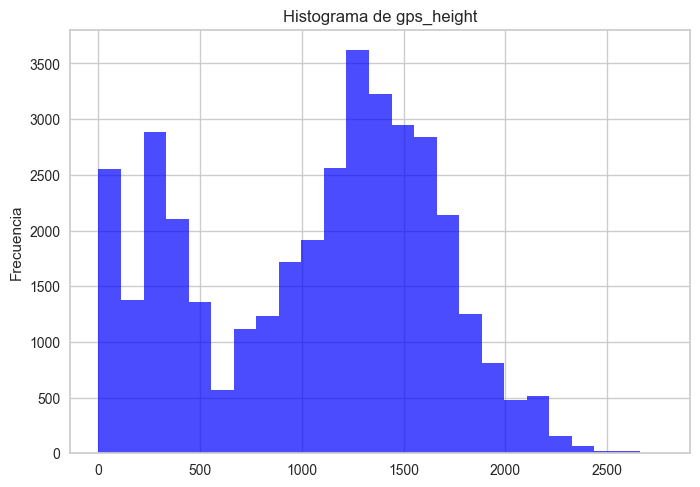

---------------------------------------------
df5 tran inputar altura: 
-------------- GPS_HEIGHT ---------------
count    59400.000000
mean      1102.652298
std        526.584591
min          1.000000
25%        759.000000
50%       1214.000000
75%       1482.500000
max       2770.000000
Name: gps_height, dtype: float64
gps_height
Atípicos inferiores: 0.0
Atípicos superiores: 0.0
% valores atípicos: 0.0
missings:  0
ceros:  0


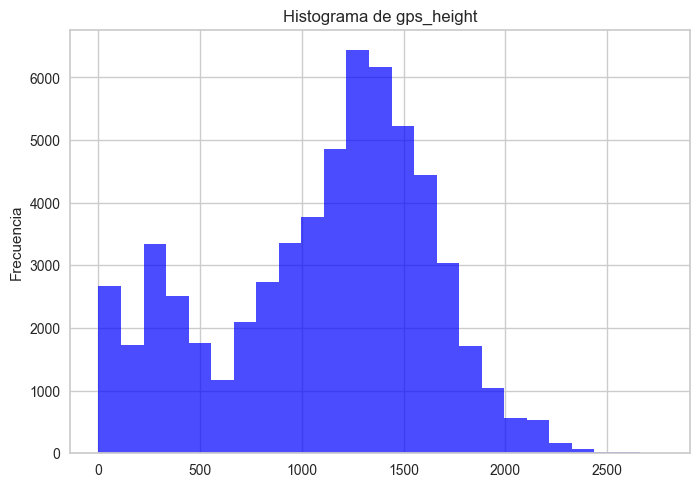

---------------------------------------------


In [13]:
print("df5 con missings: ")
descripcion_numerica(df5, 'gps_height')
print("df5 tras inputar missings: ")
descripcion_numerica(df5_altura_imputed, 'gps_height')


In [14]:
# Observamos que la distribución apenas ha cambiado entre antes y después lo cual es bueno. Este metodo debería ser mejor que imputar aleatoriamente

# De todas formas, viendo un mapa de geografía de Tanzania en wikipedia, vemos que 2/3 del pais son una meseta a 1200, y el otro tercio 
#       un llano a 400m, además de un pequeño sistema montañoso de unos 2000m de altitud, lo que encaja con el histograma
#       https://es.wikipedia.org/wiki/Geograf%C3%ADa_de_Tanzania#/media/Archivo:Tanzania_map-es.svg
#       (Entiendo que no cuenta como base de datos externa, solo es un mapa)

# Doy la altura por buena y la guardo en el df5


In [15]:
df5.head()
# Vemos un nulo en gps_height

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type,status_group,year_recorded
0,69572,6000.0,Roman,1390.0,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,functional,2011
1,8776,0.0,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,functional,2013
2,34310,25.0,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe multiple,functional,2013
3,67743,0.0,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe multiple,non functional,2013
4,19728,0.0,Action In A,NaN,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,gravity,other/unknown,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,functional,2011


In [16]:
df5_altura_imputed.head()

,id,longitude,latitude,gps_height
0,69572.0,34.938093,-9.856322,1390.0
1,8776.0,34.698766,-2.147466,1399.0
2,34310.0,37.460664,-3.821329,686.0
3,67743.0,38.486161,-11.155298,263.0
4,19728.0,31.130847,-1.825359,1527.0


In [17]:
column_order = df5.columns.tolist() # para conservar el orden de las columnas

df5 = df5.drop(['gps_height', 'longitude', 'latitude'], axis=1)
df5.head()
df5 = pd.merge(df5, df5_altura_imputed, on='id', how='inner')
df5 = df5[column_order]

df5.head()
#missing_values_summary(df5) """

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type,status_group,year_recorded
0,69572,6000.0,Roman,1390.0,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,functional,2011
1,8776,0.0,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,functional,2013
2,34310,25.0,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe multiple,functional,2013
3,67743,0.0,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe multiple,non functional,2013
4,19728,0.0,Action In A,1527.0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,gravity,other/unknown,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,functional,2011


In [18]:
missing_values_summary(df5)

,Valores Nulos,% de Valores Nulos
id,0,0.0
amount_tsh,0,0.0
funder,0,0.0
gps_height,0,0.0
installer,0,0.0
longitude,0,0.0
latitude,0,0.0
wpt_name,2,0.0
num_private,0,0.0
basin,0,0.0


-------------- SUBVILLAGE ---------------
count        59029
unique       19287
top       Madukani
freq           508
Name: subvillage, dtype: object
NaN:    371
none:   0
ceros:  0
-------------- Head y Tail ---------------
subvillage
Madukani      508
Shuleni       506
Majengo       502
Kati          373
Mtakuja       262
Sokoni        232
M             187
Muungano      172
Mbuyuni       164
Mlimani       152
Songambele    147
Msikitini     134
Miembeni      134
1             132
Kibaoni       114
Name: count, dtype: int64
subvillage
Kipompo         1
Chanyamilima    1
Ikalime         1
Kemagaka        1
Kikatanyemba    1
Name: count, dtype: int64


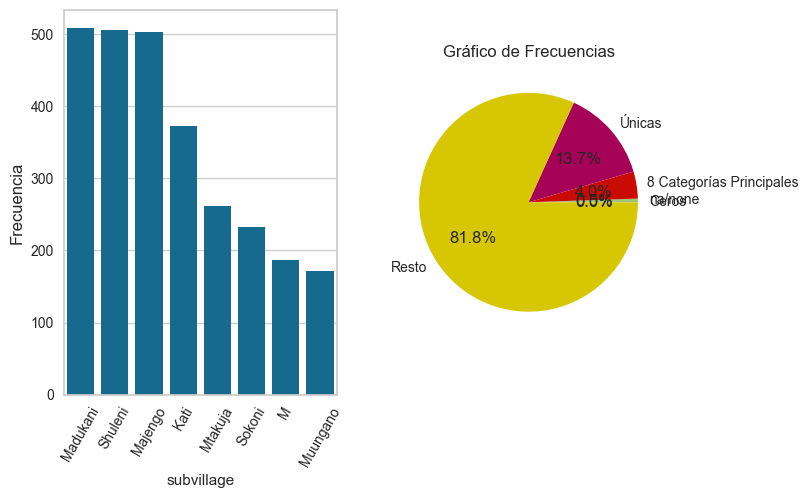

---------------------------------------------
-------------- WPT_NAME ---------------
count     59398
unique    37399
top        none
freq       3563
Name: wpt_name, dtype: object
NaN:    2
none:   3563
ceros:  0
-------------- Head y Tail ---------------
wpt_name
none               3563
Shuleni            1748
Zahanati            830
Msikitini           535
Kanisani            323
Bombani             271
Sokoni              260
Ofisini             254
School              208
Shule Ya Msingi     199
Shule               152
Sekondari           146
Muungano            133
Mkombozi            111
Madukani            104
Name: count, dtype: int64
wpt_name
Kwa Medadi                 1
Kwa Kubembeni              1
Shule Ya Msingi Milanzi    1
Funua                      1
Kwa Mzee Lugawa            1
Name: count, dtype: int64


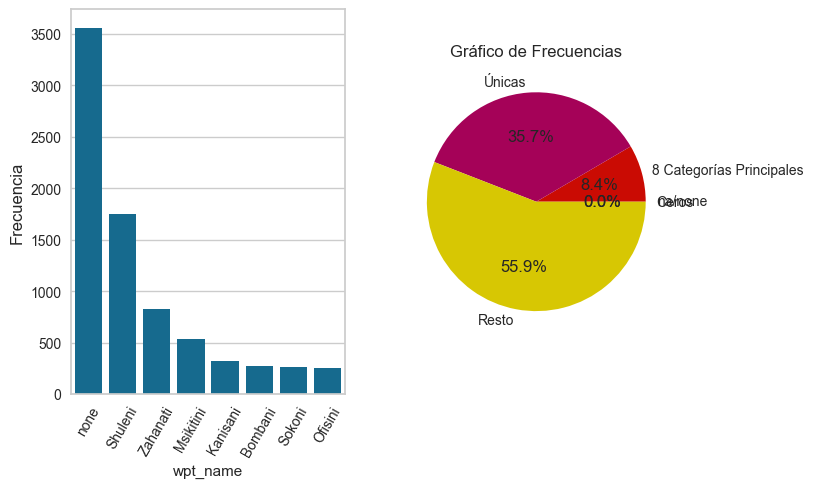

---------------------------------------------
0
3563


In [19]:
# Vamos a imputar wpt_name y subvillage
descripcion_categorica(df5,'subvillage') # Buscamos algún otro valor al que imputar como aleatorio
descripcion_categorica(df5,'wpt_name')
print((df5['subvillage'] == "none").sum())
print((df5['wpt_name'] == "none").sum())
# Vemos que hay 3563 registros en wpt_name con none
# Me llaman la atencion los nombres de subvillages que son numeros o letras sueltas. Lo voy a dejar pero 
#    más adelante pero podría probar a imputarlos como aleatorios

-------------- SUBVILLAGE ---------------
count        59400
unique       19658
top       Madukani
freq           508
Name: subvillage, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
subvillage
Madukani                508
Shuleni                 506
Majengo                 502
Kati                    373
Mtakuja                 262
Sokoni                  232
M                       187
Muungano                172
Mbuyuni                 164
Mlimani                 152
Songambele              147
Msikitini               134
Miembeni                134
1                       132
Kibaoni                 114
Kanisani                111
I                       109
Mapinduzi               109
Mjimwema                108
Mjini                   108
Mkwajuni                104
Mwenge                  102
Mabatini                 98
Azimio                   98
Mbugani                  95
Mission                  95
Bwawani                  91
Bondeni   

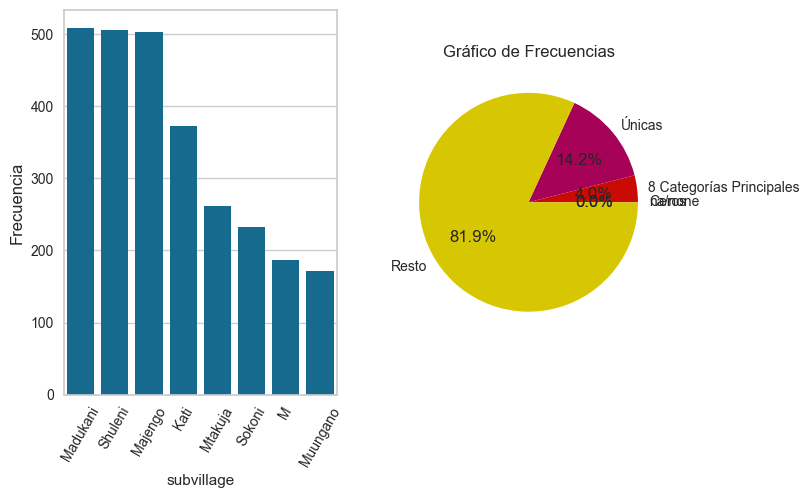

---------------------------------------------


In [20]:
# Voy a imputar los missings en wpt_name en subvillage, con nombres aleatorios como hice con installer y funder en V4.1
df5_sin_missing_location = df5.copy()

# Obtener la cantidad de valores faltantes
missing_count = df5_sin_missing_location['subvillage'].isnull().sum()
# Generar cadenas aleatorias de longitud 4
random_strings = [''.join(np.random.choice(list('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'), size=4)) for _ in range(missing_count)]
# Llenar los valores faltantes con las cadenas aleatorias
df5_sin_missing_location.loc[df5_sin_missing_location['subvillage'].isnull(), 'subvillage'] = random_strings
descripcion_categorica(df5_sin_missing_location,'subvillage', 50)

-------------- WPT_NAME ---------------
count       59400
unique      40962
top       Shuleni
freq         1748
Name: wpt_name, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
wpt_name
Shuleni              1748
Zahanati              830
Msikitini             535
Kanisani              323
Bombani               271
Sokoni                260
Ofisini               254
School                208
Shule Ya Msingi       199
Shule                 152
Sekondari             146
Muungano              133
Mkombozi              111
Madukani              104
Mbugani                94
Hospital               94
Upendo                 93
Kituo Cha Afya         90
Mkuyuni                88
Umoja                  84
Center                 83
Ccm                    81
Kisimani               78
Ofisi Ya Kijiji        76
Mtakuja                76
Tankini                73
Bwawani                66
Songambele             66
Maendeleo              64
Bondeni               

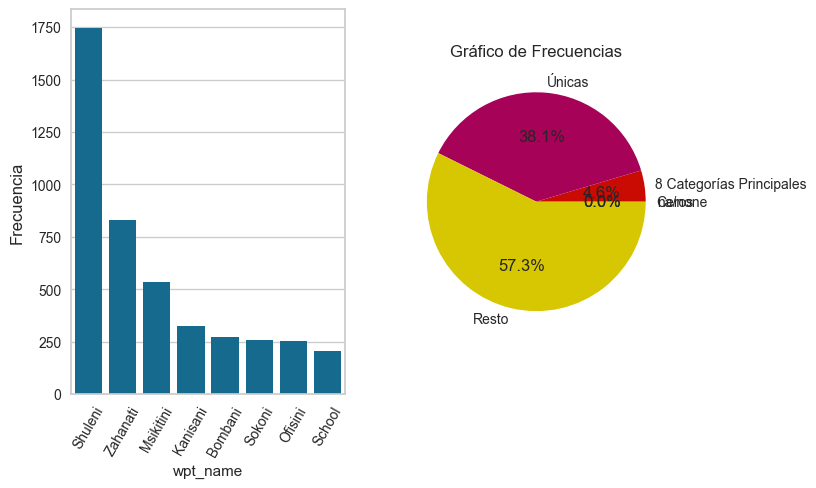

---------------------------------------------


In [21]:
df5_sin_missing_location['wpt_name'].replace('none', np.nan, inplace=True)
# Obtener la cantidad de valores faltantes
missing_count = df5_sin_missing_location['wpt_name'].isnull().sum()
# Generar cadenas aleatorias de longitud 4
random_strings = [''.join(np.random.choice(list('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'), size=4)) for _ in range(missing_count)]
# Llenar los valores faltantes con las cadenas aleatorias
df5_sin_missing_location.loc[df5_sin_missing_location['wpt_name'].isnull(), 'wpt_name'] = random_strings
descripcion_categorica(df5_sin_missing_location,'wpt_name', 50)

In [ ]:
# Probablemente esta columna no vaya a tener mucha representaciñon en el modelo ya que hay etiquetas como 'hospital' o 'school' con
#   bastante frecuencia y probablemente no agrupe bombas con elementos en común, ni siquiera geograficamente. 
# Pero de momento lo dejo

In [24]:
missing_values_summary(df5_sin_missing_location)

,Valores Nulos,% de Valores Nulos
id,0,0.0
amount_tsh,0,0.0
funder,0,0.0
gps_height,0,0.0
installer,0,0.0
longitude,0,0.0
latitude,0,0.0
wpt_name,0,0.0
num_private,0,0.0
basin,0,0.0


In [ ]:
# Guardo el .pickel y prosigo imputando missings
df5_sin_missing_location.to_pickle("./pickles_temp/V4_2.pkl")